In [1]:
import logging

In [9]:
txt = ''
with open('data/2008_44_pid=77042.txt', 'r') as f:
    txt = f.readlines()[0]
    
type(txt)

str

In [14]:
txt[:20]

'Here today, I must b'

In [32]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
sentences = sent_tokenize(txt)
sentences[:5]

['Here today, I must begin because at the Unity breakfast this morning I was saving for last and the list was so long I left him out after that introduction.',
 "So I'm going to start by saying how much I appreciate the friendship and the support and the outstanding work that he does each and every day, not just in Capitol Hill but also back here in the district.",
 'Please give a warm round of applause for your Congressman Artur Davis.',
 'It is a great honor to be here.',
 'Reverend Jackson, thank you so much.']

In [38]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences)
vectorizer.get_feature_names()
x = vectorizer.transform(sentences)
x_back = x.toarray()
x_back

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
df = pd.DataFrame(x_back, columns=vectorizer.get_feature_names())
df.head()

10  11  16  17  20  21  46  60  90  aaron    ...     wrong  wrote  year  \
0   0   0   0   0   0   0   0   0   0      0    ...         0      0     0   
1   0   0   0   0   0   0   0   0   0      0    ...         0      0     0   
2   0   0   0   0   0   0   0   0   0      0    ...         0      0     0   
3   0   0   0   0   0   0   0   0   0      0    ...         0      0     0   
4   0   0   0   0   0   0   0   0   0      0    ...         0      0     0   

   years  yet  you  young  your  yours  yourself  
0      0    0    0      0     0      0         0  
1      0    0    0      0     0      0         0  
2      0    0    0      0     1      0         0  
3      0    0    0      0     0      0         0  
4      0    0    1      0     0      0         0  

[5 rows x 1035 columns]

Let's try to get some bigrams going

In [40]:
bigram_vectorizer = CountVectorizer(ngram_range=(1,2), min_df=1)
bigrams = bigram_vectorizer.fit_transform(sentences).toarray()

df2 = pd.DataFrame(bigrams, columns=bigram_vectorizer.get_feature_names())
df2

10  10 in  10 of  10 requirement  11  11 happened  16  16 17  17  17 20  \
0     0      0      0               0   0            0   0      0   0      0   
1     0      0      0               0   0            0   0      0   0      0   
2     0      0      0               0   0            0   0      0   0      0   
3     0      0      0               0   0            0   0      0   0      0   
4     0      0      0               0   0            0   0      0   0      0   
5     0      0      0               0   0            0   0      0   0      0   
6     0      0      0               0   0            0   0      0   0      0   
7     0      0      0               0   0            0   0      0   0      0   
8     0      0      0               0   0            0   0      0   0      0   
9     0      0      0               0   0            0   0      0   0      0   
10    0      0      0               0   0            0   0      0   0      0   
11    0      0      0               0   0            0   0      0   0      0   
12    0      0      0               0   0            0   0      0   0      0   
13    0      0      0               0   0            0   0      0   0      0   
14    0      0      0               0   0            0   0      0   0      0   
15    0      0      0               0   0            0   0      0   0      0   
16    0      0      0               0   0            0   0      0   0      0   
17    0      0      0               0   0            0   0      0   0      0   
18    0      0      0               0   0            0   0      0   0      0   
19    0      0      0               0   0            0   0      0   0      0   
20    0      0      0               0   0            0   0      0   0      0   
21    0      0      0               0   0            0   0      0   0      0   
22    0      0      0               0   0            0   0      0   0      0   
23    0      0      0               0   0            0   0      0   0      0   
24    0      0      0               0   0            0   0      0   0      0   
25    0      0      0               0   0            0   0      0   0      0   
26    0      0      0               0   0            0   0      0   0      0   
27    0      0      0               0   0            0   0      0   0      0   
28    0      0      0               0   0            0   0      0   0      0   
29    0      0      0               0   0            0   0      0   0      0   
..   ..    ...    ...             ...  ..          ...  ..    ...  ..    ...   
191   0      0      0               0   0            0   0      0   0      0   
192   0      0      0               0   0            0   0      0   0      0   
193   0      0      0               0   0            0   0      0   0      0   
194   0      0      0               0   0            0   0      0   0      0   
195   0      0      0               0   0            0   0      0   0      0   
196   0      0      0               0   0            0   0      0   0      0   
197   0      0      0               0   0            0   0      0   0      0   
198   0      0      0               0   0            0   0      0   0      0   
199   0      0      0               0   0            0   0      0   0      0   
200   0      0      0               0   0            0   0      0   0      0   
201   0      0      0               0   0            0   0      0   0      0   
202   0      0      0               0   0            0   0      0   0      0   
203   0      0      0               0   0            0   0      0   0      0   
204   0      0      0               0   0            0   0      0   0      0   
205   0      0      0               0   0            0   0      0   0      0   
206   0      0      0               0   0            0   0      0   0      0   
207   0      0      0               0   0            0   0      0   0      0   
208   0      0      0               0   0            0   0      0   0      0   
209  

In [47]:
# How about getting some counts
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"']

from textblob import TextBlob
from nltk.util import ngrams

from collections import defaultdict
from operator import itemgetter

counter = defaultdict(int)

n=3

for doc in sentences:
    words = TextBlob(doc).words
    words = [w for w in words if w not in stop]
    bigrams = ngrams(words, n)
    for gram in bigrams:
        counter[gram] +=1
        
for gram, count in sorted(counter.items(), key=itemgetter(1), reverse=True):
    phrase = " ".join(gram)
    print('{} {}'.format(phrase, count))

Be strong courage 8
I ca n't 7
I 'm sure 4
generation teaches us 3
You 've got 3
Moses generation teaches 3
civil rights movement 3
We 've got 3
ca n't something 3
'm sure I 3
I announced I 2
Unity Breakfast morning 2
We 're going 2
making sure 're 2
I wherever go 2
generation make sure 2
Joshua generation make 2
I n't think 2
announced I running 2
terms people treated 2
A hope gap 2
strong courage face 2
imagine something different 2
I 'll tell 2
I got letter 2
ca n't run 2
're competing folks 2
Do n't tell 2
I 've promised 2
I worry sometimes 2
somebody else 's 2
happened Selma Alabama 2
see I 've 2
I 'm going 2
n't tell I 2
courage I wherever 2
health care gap 2
strong courage I 2
still got lot 2
America battled America 1
n't run Congress 1
million people uninsured 1
work discipline self-sacrifice 1
young African Americans 1
announced encouraging stay 1
scripture house divided 1
stand shoulders giants 1
sense young children 1
might possible us 1
Moses first called 1
'm going start 1

# we are going to get put all the text in one list

In [48]:
import os

In [91]:
example = []

for file in fileList:
    with open(os.getcwd()+'\\data\\'+file, 'r') as f:
        try:
            txt2 = f.readlines()[0]
            txt2 = txt2.replace("\'", "'")
            if len(txt2) > 0:
                example.append(txt2)
        except Exception as e:
            print(file, e)

2008_44_pid=77021.txt list index out of range
2008_44_pid=77022.txt list index out of range
2008_44_pid=77024.txt list index out of range
2008_44_pid=77025.txt list index out of range
2008_44_pid=77040.txt list index out of range
2008_44_pid=77755.txt list index out of range
2008_44_pid=78613.txt list index out of range
2008_44_pid=84469.txt list index out of range
2008_44_pid=84572.txt list index out of range
2008_44_pid=84608.txt list index out of range
2008_44_pid=84747.txt list index out of range
2008_44_pid=84931.txt list index out of range
2008_44_pid=84932.txt list index out of range


In [112]:
%pylab inline
import numpy 
import matplotlib.pyplot as plt
import sklearn
# Import all of the scikit learn stuff
from __future__ import print_function
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans

Populating the interactive namespace from numpy and matplotlib


In [113]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(example) 
pd.DataFrame(dtm.toarray(), index=example, columns=vectorizer.get_feature_names()).head(10)

00  000  01  04  07  10  \
Wherever I go, I talk about how we need to brin...   0    3   0   0   0   1   
Thank you, New Hampshire. I love you back. Than...   0    0   0   0   0   0   
[joined in progress]PRESIDENT SARKOZY: ... Now,...   0    0   0   0   0   0   
Thank you, Iowa. You know, they said this day w...   0    0   0   0   0   0   
Thank you, South Carolina! (Cheers, applause.) ...   0    0   1   0   0   0   
Thank you. (Cheers, applause.) Thank you. Thank...   0    0   0   0   0   0   
Today, the change we seek swept through the Che...   0    1   0   0   0   0   
Well, we are in the middle of a very close race...   0    0   1   0   0   0   
It has now been one year since we began this ca...   0    3   0   0   0   0   
Houston, I think we've achieved liftoff here. (...   0    5   0   0   0   3   

                                                    100  1000  100th  101  \
Wherever I go, I talk about how we need to brin...    0     0      0    0   
Thank you, New Hampshire. I love you back. Than...    0     0      0    0   
[joined in progress]PRESIDENT SARKOZY: ... Now,...    0     0      0    0   
Thank you, Iowa. You know, they said this day w...    0     0      0    0   
Thank you, South Carolina! (Cheers, applause.) ...    0     0      0    0   
Thank you. (Cheers, applause.) Thank you. Thank...    1     0      0    0   
Today, the change we seek swept through the Che...    0     0      0    0   
Well, we are in the middle of a very close race...    0     0      0    0   
It has now been one year since we began this ca...    1     0      0    0   
Houston, I think we've achieved liftoff here. (...    1     0      0    0   

                                                    ...   yucca  zakaria  \
Wherever I go, I talk about how we need to brin...  ...       0        0   
Thank you, New Hampshire. I love you back. Than...  ...       0        0   
[joined in progress]PRESIDENT SARKOZY: ... Now,...  ...       0        0   
Thank you, Iowa. You know, they said this day w...  ...       0        0   
Thank you, South Carolina! (Cheers, applause.) ...  ...       0        0   
Thank you. (Cheers, applause.) Thank you. Thank...  ...       0        0   
Today, the change we seek swept through the Che...  ...       0        0   
Well, we are in the middle of a very close race...  ...       0        0   
It has now been one year since we began this ca...  ...       0        0   
Houston, I think we've achieved liftoff here. (...  ...       0        0   

                                                    zawahari  zero  zimbabwe  \
Wherever I go, I talk about how we need to brin...         0     0         0   
Thank you, New Hampshire. I love you back. Than...         0     0         0   
[joined in progress]PRESIDENT SARKOZY: ... Now,...         0     0         0   
Thank you, Iowa. You know, they said this day w...         0     0         0   
Thank you, South Carolina! (Cheers, applause.) ...         0     0         0   
Thank you. (Cheers, applause.) Thank you. Thank...         0     0         0   
Today, the change we seek swept through the Che...         0     0         0   
Well, we are in the middle of a very close race...         0     0         0   
It has now been one year since we began this ca...         0     0         0   
Houston, I think we've achieved liftoff here. (...         0     0         0   

                                                    zionist  zip  zone  zones  \
Wherever I go, I talk about how we need to brin...        0    0     0      0   
Thank you, New Hampshire. I love you back. Than...        0    0     0      0   
[joined in progress]PRESIDENT SARKOZY: ... Now,...        0    0     0      1   
Thank you, Iowa. You know, they said this day w...        0    0     0      0   
Thank you, South Carolina! (Cheers, applause.) ...        0    0     0      0   
Thank you. (Cheers, applause.) Thank you. Thank...        0    0     0      0   
Today, the change we seek swept through the Che..

In [114]:
# Get words that correspond to each column 
vectorizer.get_feature_names()

['00',
 '000',
 '01',
 '04',
 '07',
 '10',
 '100',
 '1000',
 '100th',
 '101',
 '102',
 '106',
 '107',
 '10th',
 '11',
 '110',
 '112',
 '114',
 '115',
 '116',
 '11th',
 '12',
 '120',
 '123',
 '125',
 '12th',
 '13',
 '130',
 '133',
 '1338',
 '14',
 '140',
 '144',
 '148',
 '1492',
 '15',
 '150',
 '1500',
 '154',
 '159',
 '15th',
 '16',
 '164',
 '165',
 '168',
 '16th',
 '17',
 '170',
 '1701',
 '175',
 '1775',
 '1787',
 '18',
 '1808',
 '1827',
 '183',
 '185',
 '19',
 '1908',
 '1915',
 '1920s',
 '1930s',
 '1931',
 '1945',
 '1948',
 '1949',
 '1950',
 '1957',
 '1960',
 '1960s',
 '1965',
 '1968',
 '1970s',
 '1973',
 '1980',
 '1980s',
 '1984',
 '1985',
 '1986',
 '1988',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1996',
 '1999',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '202',
 '2020',
 '2022',
 '2025',
 '2030',
 '2040',
 '2050',
 '20th',
 '21',
 '21

In [115]:
# Fit LSA. Use algorithm = “randomized” for large datasets 
#lsa = TruncatedSVD(2, algorithm = 'arpack')
lsa = TruncatedSVD(2, algorithm = 'randomized')
dtm_lsa = lsa.fit_transform(dtm)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [116]:
lsa.explained_variance_ratio_

array([ 0.13951866,  0.14278022])

In [119]:
# Note tha teach component is a eigenvector 
# and eigenvector is the vector that maximizes the vector with the most variance 
# for n dimensional space we have vectors (eigenvectors) that show most correlation with output
# we have two components here since we have choosen two eigenvalue and eigenvector pairs.

# pd.DataFrame(lsa.components_.round(5),index = ["component_1","component_2","component_3","component_4",
#                                                "component_5"],columns = vectorizer.get_feature_names())

pd.DataFrame(lsa.components_.round(5),index = ["component_1","component_2"],columns = vectorizer.get_feature_names())

00      000       01       04       07       10      100  \
component_1  0.00005  0.04309  0.00009  0.00050  0.00078  0.01566  0.00737   
component_2  0.00007 -0.02391 -0.00006  0.00138  0.00218  0.00224 -0.00474   

                1000    100th      101   ...       yucca  zakaria  zawahari  \
component_1  0.00040  0.00007  0.00044   ...     0.00006  0.00242   0.00012   
component_2 -0.00077 -0.00011  0.00039   ...    -0.00012  0.00683  -0.00012   

                zero  zimbabwe  zionist      zip     zone    zones     zuma  
component_1  0.00054   0.00063  0.00007  0.00010  0.00140  0.00074  0.00017  
component_2 -0.00064   0.00082 -0.00001 -0.00008  0.00078  0.00057  0.00031  

[2 rows x 12544 columns]

In [120]:
list(vectorizer.get_feature_names())

['00',
 '000',
 '01',
 '04',
 '07',
 '10',
 '100',
 '1000',
 '100th',
 '101',
 '102',
 '106',
 '107',
 '10th',
 '11',
 '110',
 '112',
 '114',
 '115',
 '116',
 '11th',
 '12',
 '120',
 '123',
 '125',
 '12th',
 '13',
 '130',
 '133',
 '1338',
 '14',
 '140',
 '144',
 '148',
 '1492',
 '15',
 '150',
 '1500',
 '154',
 '159',
 '15th',
 '16',
 '164',
 '165',
 '168',
 '16th',
 '17',
 '170',
 '1701',
 '175',
 '1775',
 '1787',
 '18',
 '1808',
 '1827',
 '183',
 '185',
 '19',
 '1908',
 '1915',
 '1920s',
 '1930s',
 '1931',
 '1945',
 '1948',
 '1949',
 '1950',
 '1957',
 '1960',
 '1960s',
 '1965',
 '1968',
 '1970s',
 '1973',
 '1980',
 '1980s',
 '1984',
 '1985',
 '1986',
 '1988',
 '1990',
 '1990s',
 '1991',
 '1992',
 '1993',
 '1994',
 '1996',
 '1999',
 '19th',
 '1st',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '202',
 '2020',
 '2022',
 '2025',
 '2030',
 '2040',
 '2050',
 '20th',
 '21',
 '21

In [123]:
# pd.DataFrame(dtm_lsa.round(5), index = example, columns = ["component_1","component_2","component_3","component_4","component_5"])
pd.DataFrame(dtm_lsa.round(5), index = example, columns = ["component_1","component_2"])

component_1  component_2
Wherever I go, I talk about how we need to brin...      0.91772     -0.39723
Thank you, New Hampshire. I love you back. Than...      0.96574     -0.25951
[joined in progress]PRESIDENT SARKOZY: ... Now,...      0.93092      0.36522
Thank you, Iowa. You know, they said this day w...      0.96909     -0.24671
Thank you, South Carolina! (Cheers, applause.) ...      0.99745     -0.07135
Thank you. (Cheers, applause.) Thank you. Thank...      0.98900     -0.14794
Today, the change we seek swept through the Che...      0.96720     -0.25401
Well, we are in the middle of a very close race...      0.96858     -0.24871
It has now been one year since we began this ca...      0.95039     -0.31106
Houston, I think we've achieved liftoff here. (...      0.99984      0.01772
“We the people, in order to form a more perfect...      0.98041     -0.19697
We meet today at a moment of great uncertainty ...      0.88282     -0.46971
Thank you so much for your kind introduction an...      0.99968      0.02531
It's great to be here. I've been speaking to a ...      0.99707     -0.07647
I want to thank the University of Iowa for havi...      0.88672     -0.46230
On behalf of the great state of Illinois, cross...      0.96919     -0.24632
Let me start by congratulating a great American...      0.99806      0.06225
It's good to be back in New Orleans. I'm just s...      0.92490     -0.38021
Good morning, President LeBlanc, the Board of T...      0.99665     -0.08183
Thank you Congressman Kennedy and Caroline and ...      0.97016     -0.24247
Our economy has been struggling for some time n...      0.94534     -0.32608
Five years ago, the war in Iraq began. And on t...      0.94671     -0.32210
We meet here at a time of challenge and uncerta...      0.92084     -0.38994
As Mike said, today represents a tragic anniver...      0.98456     -0.17506
Being here in Pennsylvania with the primary com...      0.96619     -0.25784
We meet here at a challenging time for our fami...      0.95602     -0.29330
Let me begin by saying thanks to all you who've...      0.98572     -0.16841
America is a country that hasn't come easily. I...      0.93730     -0.34853
It is an honor to be here at Southern Universit...      0.98292     -0.18405
It is an honor to be here at Hampton University...      0.99680     -0.07989
...                                                         ...          ...
We meet at a moment of great uncertainty for Am...      0.90231     -0.43109
We meet at a moment of great uncertainty for Am...      0.89257     -0.45090
We meet at a moment of great uncertainty for Am...      0.88110     -0.47293
The events of the last few weeks have shown us ...      0.88778     -0.46026
We meet at a moment of great uncertainty for Am...      0.89684     -0.44235
We meet at a moment of great uncertainty for Am...      0.91037     -0.41379
Hello, Tampa! And congratulations to your Rays!...      0.92718     -0.37461
I want to thank you all for joining us here in ...      0.87279     -0.48810
One week. After decades of broken politics in W...      0.90605     -0.42316
Nevada, in just 10 days, you'll have the chance...      0.91604     -0.40109
It is fitting that we meet today on the mall of...      0.90619     -0.42288
Hello, Charleston! Hello, West Virginia! It is ...      0.99597     -0.08967
Hello, Miami! It's great to be here today in th...      0.91067     -0.41312
Good morning. We just finished a meeting with S...      0.95158     -0.30740
Hello, Richmond! It's great to be back in Virgi...      0.90031     -0.43525
North Carolina, I've got two words for you: six...      0.90939     -0.41594
One week. After decades of broken politics in W...      0.90276     -0.43015
Florida, I have just two words for you: five da...      0.91720     -0.39843
Thank you for having us here tonight in this pl...      0.99718     -0.07502
I wanted to have a chance to talk to you, becau...      0.90642      0.42237
GIBSON: Senator, we're undergoing a global mark.

In [124]:
xs = [w[0].round(5) for w in dtm_lsa] 
ys = [w[1].round(5) for w in dtm_lsa]
# c_[xs, ys]

C:\Python34\Lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


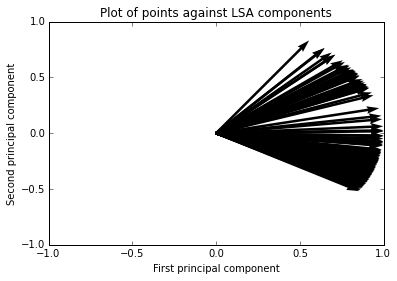

In [125]:
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01) 
# ax.quiver(0,0,xs,ys,scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA components')
plt.draw()
plt.show()

In [126]:
# Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T) 
pd.DataFrame(similarity.round(5),index=example, columns=example).head(10)
#pd.DataFrame(similarity.round(5),index=(range(6)), columns=(range(6))).head(10)

Wherever I go, I talk about how we need to bring about real change in this country. And few understand the need for change as well as folks here in Michigan. Because while we've been talking about a recession in this country for a few months now, Michigan has been living it for a very long time. Michigan has the highest unemployment rate in the nation and workers and communities across this state have been struggling for years with the downturn that all of America is feeling today. In fairness, some of these challenges are the product of larger forces beyond the control of government. But there is no doubt that the Bush economic policies have done little to help the working families of Michigan or build a better future for America. That is, in large part, what this election in November will be all about. Because Senator McCain says we have made, and this is a quote, "great progress economically" these past eight year, and he promises more of the same. Well, I couldn't disagree more. Since George Bush took office, we've gone through the first period of sustained economic growth since World War II in which the incomes of American workers have actually dropped. 7 million more Americans don't have health care. 1 million more Americans are out of work. Millions of families are facing foreclosure. You're working harder for less, and paying more for tuition, more for groceries, and more at the pump. To me, this isn't "great progress." This is a cause for concern and an impetus for change. Yet Senator McCain wants to double down on the Bush economic plan. Rather than reforming an unfair tax system and offering the middle class some relief, he's offering more tax loopholes for corporations and the wealthy we just can't afford. Rather than making health care affordable for every American, like I've proposed, he's offering a health care plan that puts coverage at risk and that's designed for folks who are already healthy and able to afford health care at any price. And rather than standing up for robust trade that works for all Americans, as I do, he's supporting more trade deals that work for Wall Street, but not for Main Street. But understand, there's a reason the problems we face today are so much bigger than they were several years ago. A big part of it is that George Bush and John McCain have been so focused on pursuing a flawed and costly war in Iraq that they've lost sight of our mounting problems here at home. Instead of working to fix our economy and lift up hardworking families, they've fought to extend a war that's costing thousands of lives and billions of dollars without making us any safer -- a war that has strengthened our enemies and distracted us from the real battle with Osama bin Ladin in Afghanistan and Pakistan. Just to put this in perspective, for what taxpayers here in Oakland County have spent in Iraq, you could be providing health care for nearly 900,000 people, or offering more than 200,000 college scholarships for Michigan students, or hiring more than 30,000 elementary school teachers. And now it seems like all Senator McCain is talking about on the campaign trail is Iraq - instead of offering real solutions to the problems you face every day. In fact, Senator McCain conceded not long ago that he didn't know much about the economy. That's not his interest. That's not his priority. But it will be mine. I want to end a war that's costing America $10 billion a month and begin to make the critical investments we need to get our own country moving again. That's the choice in this election. Are we going to continue the failed Bush-McCain economic policies and remain mired in an endless and costly conflict in Iraq, or will we change course, and focus on the problems that working families in Michigan and across America are facing every day? I believe strongly that we are on the wrong path, and that we need new priorities and a new direction and that is why I'm running for President or the United States.  \
Wherever I

In [127]:
numpy.asmatrix(dtm_lsa)

matrix([[ 0.91772064, -0.39722642],
        [ 0.96573942, -0.25951372],
        [ 0.93091936,  0.36522478],
        [ 0.96908895, -0.24671158],
        [ 0.99745111, -0.07135329],
        [ 0.9889963 , -0.14794023],
        [ 0.96720187, -0.25400893],
        [ 0.96857828, -0.2487089 ],
        [ 0.95038932, -0.31106292],
        [ 0.99984304,  0.01771708],
        [ 0.98040895, -0.19697279],
        [ 0.88281899, -0.46971336],
        [ 0.99967974,  0.02530656],
        [ 0.99707201, -0.07646836],
        [ 0.88672318, -0.46230076],
        [ 0.9691882 , -0.24632141],
        [ 0.99806055,  0.06225066],
        [ 0.9248984 , -0.38021435],
        [ 0.9966459 , -0.08183488],
        [ 0.97015999, -0.24246566],
        [ 0.94534329, -0.32607677],
        [ 0.94670547, -0.32210052],
        [ 0.92084065, -0.38993909],
        [ 0.9845569 , -0.17506485],
        [ 0.96618877, -0.25783571],
        [ 0.95602139, -0.29329696],
        [ 0.98571639, -0.16841376],
        [ 0.93729802, -0.348

In [128]:
nmf_model = NMF(2)

In [129]:
dtm_nmf = nmf_model.fit_transform(dtm)
dtm_nmf = Normalizer(copy=False).fit_transform(dtm_nmf)

In [130]:
dtm.shape

(214, 12544)

In [ ]:
dtm.

In [131]:
dtm_nmf.round(2)

array([[ 1.  ,  0.01],
       [ 0.97,  0.25],
       [ 0.27,  0.96],
       [ 0.97,  0.26],
       [ 0.83,  0.56],
       [ 0.9 ,  0.44],
       [ 0.97,  0.26],
       [ 0.96,  0.27],
       [ 0.99,  0.16],
       [ 0.72,  0.69],
       [ 0.93,  0.36],
       [ 1.  ,  0.  ],
       [ 0.71,  0.7 ],
       [ 0.83,  0.56],
       [ 1.  ,  0.  ],
       [ 0.96,  0.27],
       [ 0.67,  0.74],
       [ 1.  ,  0.04],
       [ 0.83,  0.55],
       [ 0.96,  0.27],
       [ 0.99,  0.17],
       [ 0.99,  0.14],
       [ 1.  ,  0.03],
       [ 0.92,  0.4 ],
       [ 0.96,  0.27],
       [ 0.98,  0.2 ],
       [ 0.91,  0.41],
       [ 0.99,  0.1 ],
       [ 0.92,  0.39],
       [ 0.83,  0.55],
       [ 0.99,  0.11],
       [ 0.96,  0.29],
       [ 0.95,  0.3 ],
       [ 0.97,  0.24],
       [ 1.  ,  0.  ],
       [ 0.93,  0.38],
       [ 0.99,  0.12],
       [ 0.95,  0.3 ],
       [ 0.87,  0.5 ],
       [ 1.  ,  0.04],
       [ 1.  ,  0.  ],
       [ 0.8 ,  0.6 ],
       [ 0.86,  0.51],
       [ 1.